# Class 2: Introduction to Networkx 1 — Graph Objects, Properties, Importing Data
Goal of today's class:
1. Introduce basic network properties
2. Show various network data input/output approaches
3. Calculate basic network properties from scratch (and their `networkx` analogs)
__________

1. Come in. Sit down. Open Teams.
2. Find your notebook in your /Class_02/ folder.
________

## Basic Definitions
- An ***undirected graph*** $G$ is defined by a pair of sets $G = (V,E)$, where $V$ is a non-empty countable set of elements referred to as *nodes* or *vertices* and $E$ is a set of *non-ordered* pairs of different vertices, known as *edges* or *links*.
- A ***directed graph*** (sometimes shorthanded to "digraph") is defined by a pair of sets $G = (V,E)$, where $V$ is non-empty countable set of elements, *nodes* or *vertices*, and $E$ is a set of *ordered* pairs of different vertices, **directed** *edges* or *links*.

Let us denote the **total number of nodes** in the graph as $N$ (also referred to as the **cardinality** of the set $V$, or sometimes the **order** of the graph) and the **total number of edges** as $M$.

The **density** of the graph is the number of edges of graph $G$ divided by the maximum possible number of edges:
- in an *undirected graph*, density = $\dfrac{2 M}{N(N-1)}$

- in an *directed graph*, density = $\dfrac{M}{N(N-1)}$

## Network Representations

Based on the basic definitions above, all we need to create a network is 1) a list of nodes, and 2) a list of which nodes are connected (i.e., edges). We say that two vertices $i$ and $j$ are adjacent or connected or (nearest) neighbors if there exists an edge $e_{ij} \in E$ joining them. Note that if we assume that there are no nodes with zero connections, all we really need to represent our graph is a list of edges.


For **undirected graphs**, an **edgelist** is a set of *non-ordered node pairs* where each pair represents a link between two nodes.

![../../images/graph_undirected.png](../../images/graph_undirected.png)
Figure 1: Undirected Graph

For example, in Figure 1 above, the undirected network has the following edgelist:
$\left\{ (0,1),(0,2),(0,3),(0,4),(1,2),(1,3),(1,5),(2,3),(4,5) \right\}$.

![../../images/graph_directed.png](../../images/graph_directed.png)
Figure 2: Directed Graph

In the case of a **directed graph**, the edgelist is a set of *ordered node pairs*, where directionality of the connection is encoded in the order that the nodes are listed (i.e., the first node can be thought of as the *source*, and the second node as the *target*). As an example, the directed graph in Figure 2 above can be represented by the following edgelist: $\left\{ (0,1),(0,5),(1,2),(1,3),(2,5),(3,2),(4,0),(4,5) \right\}$.

_______

A graph $G=(V,E)$ can be represented mathematically by an $N\times N$ ***adjancency matrix*** $A$.

$$ A = 
\begin{pmatrix}
    a_{1,1} & a_{1,2} & \cdots & a_{1,N} \\
    a_{2,1} & a_{2,2} & \cdots & a_{2,N} \\
    \vdots  & \vdots  & \ddots & \vdots  \\
    a_{N,1} & a_{N,2} & \cdots & a_{N,N} 
\end{pmatrix},$$
 
where $\forall i,j \in V$, 
$$a_{ij} =
\begin{cases}
    1    & \quad \text{if } e_{ij} \in E\\
    0    & \quad \text{if } e_{ij} \notin E\\
\end{cases}$$
    
In an *undirected graph*, the adjacency matrix $A$ is symmetric such that $a_{ij} = a_{ji}$; in a *directed graph* the elements $a_{ij}$ and $a_{ji}$ are not necessarily equivalent (a property called *reciprocity*).

**Note:** A lot in network science leads back to *linear algebra*, a topic in mathematics that describes matrices and their properties. The fact that we can represent a network as a matrix opens a world of possible questions we can ask of the graphs we'll be working with.

Adjacency matrices also permit us to represent weighted edges, yielding a ***weighted graph***, which is a network (undirected or directed) where we associate a value (usually a real number) to each edge. This weighted graph $G=(V,E,\Omega)$, then, we can define using with a $N\times N$ *weighted adjancency matrix*, $W$.

$$ W = 
\begin{pmatrix}
    w_{1,1} & w_{1,2} & \cdots & w_{1,N} \\
    w_{2,1} & w_{2,2} & \cdots & w_{2,N} \\
    \vdots  & \vdots  & \ddots & \vdots  \\
    w_{N,1} & w_{N,2} & \cdots & w_{N,N} 
\end{pmatrix},
$$
 
where $\forall i,j \in V$,
$$w_{ij} =
\begin{cases}
    w    & \quad \text{if } e_{ij} \in E\\
    0    & \quad \text{if } e_{ij} \notin E\\
\end{cases}
$$
______________

### Adjacency Matrices and Network Properties

Consider the undirected adjacency matrix, $A$, of the graph in Figure 1, above:

$$ A = 
\begin{pmatrix}
    0 & 1 & 1 & 1 & 1 & 0 \\
    1 & 0 & 1 & 1 & 0 & 1 \\
    1 & 1 & 0 & 1 & 0 & 0 \\
    1 & 1 & 1 & 0 & 0 & 0 \\
    1 & 0 & 0 & 0 & 0 & 1 \\
    0 & 1 & 0 & 0 & 1 & 0 \\
\end{pmatrix}.$$

Often, working with an adjacency matrix is not ideal. Matrices are large objects, and the price we pay to loop over one node's neighbors is high (i.e. $O(N)$), and it can be quite impractical when dealing with large but **sparse** graphs (networks for which the number of edges $|E|$ in the graph scales as $|E| \sim N^\alpha$ with $\alpha <2$).

For this reason, we can also consider storing a network using an **adjacency list** rather than an adjacency matrix. This lets us store a graph as a set of lists where each list is associated with each node and its list of neighbors. The table below shows the adjacency list for the graph in Figure 1.

| Vertex | Neighbors   |
|------|------|
|   0  | [1,2,3,4] |
|   1  | [0,2,3,5] |
|   2  | [0,1,3] |
|   3  | [0,1,2] |
|   4  | [0,5] |
|   5  | [1,4] |


#### Sanity check (and little `networkx` preview)

In [1]:
import networkx as nx
import numpy as np

edgelist = [(0,1),(0,2),(0,3),(0,4),(1,2),(1,3),(1,5),(2,3),(4,5)]

adjacency_dict = {0: [1,2,3,4],
                  1: [0,2,3,5],
                  2: [0,1,3],
                  3: [0,1,2],
                  4: [0,5],
                  5: [1,4]}

adjacency_matrix = np.array([[0,1,1,1,1,0],
                             [1,0,1,1,0,1],
                             [1,1,0,1,0,0],
                             [1,1,1,0,0,0],
                             [1,0,0,0,0,1],
                             [0,1,0,0,1,0]])


G1 = nx.from_edgelist(edgelist, create_using=nx.Graph)
G2 = nx.from_dict_of_lists(adjacency_dict, create_using=nx.Graph)
G3 = nx.from_numpy_array(adjacency_matrix, create_using=nx.Graph)

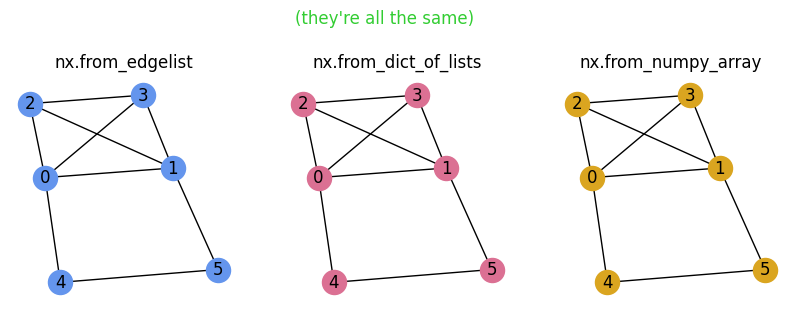

In [2]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(G1)

fig, ax = plt.subplots(1,3,figsize=(10,3),dpi=100)

nx.draw(G1, pos=pos, node_color='cornflowerblue', with_labels=True, ax=ax[0])
ax[0].set_title('nx.from_edgelist')

nx.draw(G2, pos=pos, node_color='palevioletred', with_labels=True, ax=ax[1])
ax[1].set_title('nx.from_dict_of_lists')

nx.draw(G3, pos=pos, node_color='goldenrod', with_labels=True, ax=ax[2])
ax[2].set_title('nx.from_numpy_array')


plt.suptitle("(they're all the same)",y=1.1,color='limegreen')


plt.show()

Nice!
___________

## Diving into `networkx`

In [3]:
import networkx as nx
nx.__version__

'3.1'

### Graph objects
From the `networkx` documentation page: 

    "By definition, a Graph is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc). In NetworkX, nodes can be any hashable object e.g., a text string, an image, an XML object, another Graph, a customized node object, etc."
    
Source: https://networkx.org/documentation/latest/tutorial.html

___________

#### Note on Bipartite Networks

A ***bipartite*** graph (or "two-mode network") is a graph with two distinct sets or classes of vertices, such that edges only exist *between* the two vertex types. Formally, a graph $G=(V,E)$ is bipartite if the set of nodes $V$ is composed by two distinct and disjoint sets $V_1, V_2$ and all edges $e_{i,j} \in E$ are such that $i\in V_1$ and $j\in V_2$.

A bipartite graph $G=(V = \{V_1,V_2\},E)$ can be represented mathematically by a $N_1\times N_2$ ***incidence matrix***, $B$

$$ B = 
\begin{pmatrix}
    b_{1,1} & b_{1,2} & \cdots & b_{1,N_2} \\
    \vdots  & \vdots  & \ddots & \vdots  \\
    b_{N_1,1} & b_{N,2} & \cdots & b_{N_1,N_2} 
\end{pmatrix},$$
where $N_1 = |V_1|$, $N_2 = |V_2|$, and $\forall i \in V_1$ and $j \in V_2$, 
$$b_{i,j} =
\begin{cases}
    1    & \quad \text{if } e_{i,j} \in E\\
    0    & \quad \text{if } e_{i,j} \notin E\\
\end{cases}$$

<!-- In this example we are going to use a bipartite graph obtained collecting users <i>metadata</i>. <br>
The analysis in this example is based on information gathered by our field agent Mr David Hackett Fischer and published in an Appendix to his report to the government. For more details consult: https://github.com/kjhealy/revere .
 -->
_________________

#### Note on Multigraphs

The most common objects we'll be using in `networkx` are `nx.Graph` and `nx.DiGraph`, but there are other classes of graphs that may be more suitable for describing certain processes. `networkx`'s `nx.MultiGraph` and `nx.MultiDiGraph` permit multiple edges (directed or not) to exist between pairs of nodes.

For instance, consider a bipartite network projection where pairs of students share a connection if they are enrolled in the same class at the same time (e.g. this current class). What if two students are in more than one class together? What are different ways to imagine incorporating this into the graph structure? When might it matter?

**Important to note**: Some algorithms are not well-defined (or, are least, not clearly-defined) on multigraphs, for example there are multiple ways to imagine shortest paths, betweenness, clustering, etc. when there are multiple links connecting pairs of nodes.
_____________

**First up:** Let's create two distinct empty graphs:

In [4]:
graph = nx.Graph() # undirected graph
digraph = nx.DiGraph() # directed graph

#### Adding nodes:

In [5]:
# We can populate the graphs with some nodes, and we can do this in several ways:

# 1) We can add one node at the time
for i in range(10):
    graph.add_node(i)

In [6]:
list(graph.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [7]:
# 2) We can add nodes from a list or any other iterable container
nodes = ['a','b','c','d','e'] # notice that nodes can be strings
digraph.add_nodes_from(nodes)

In [8]:
list(digraph.nodes())

['a', 'b', 'c', 'd', 'e']

In [9]:
# 3) We can also directly add edges and if the node is not present, it will be added
graph.add_edge(1,20)

In [10]:
list(graph.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 20]

In [11]:
graph.add_edge('brennan','enya')
list(graph.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 20, 'brennan', 'enya']

#### Adding edges:

In [12]:
# Now that we added a bunch of nodes, we can add some edges
# 1) We can add one edge at the time (as we have just witnessed above)
digraph.add_edge('a','b')
digraph.add_edge('c','a')

In [13]:
list(digraph.edges())

[('a', 'b'), ('c', 'a')]

In [14]:
# 2) We can add an entire edge list all at once
edge_list = [(1,2), (3,5), (9,4), (4,7)]
graph.add_edges_from(edge_list)

In [15]:
# We can retrieve the list of edges in each graph by simply running
print(graph.edges())

[(1, 20), (1, 2), (3, 5), (4, 9), (4, 7), ('brennan', 'enya')]


In [16]:
# When graphs are big (either in terms of the number of nodes or in terms of the number of edges),
# it is more convenient to loop over "iterators" and not over lists.
for edge in graph.edges():
    print(edge)

(1, 20)
(1, 2)
(3, 5)
(4, 9)
(4, 7)
('brennan', 'enya')


In [17]:
# We can also retrieve the list of neighbors of a given node
print(list(graph.neighbors(1)))
print(list(digraph.predecessors('a')))
print(list(digraph.successors('a')))

[20, 2]
['c']
['b']


#### Adding node and edge attributes
In `networkx`, we can add additional features to our graphs above and beyond simply nodes and edges. In particular, we can add *attributes*.

In [18]:
# For example, we might wanna add a "size" attribute to each node, 
# so we can use it once we decide to visualize a graph.
graph.add_node(50,size=100,weight=90,height=600)

In [19]:
list(graph.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 20, 'brennan', 'enya', 50]

In [20]:
print(graph.nodes(data=True)) # the "data=True" bit means you want to see node attributes

[(0, {}), (1, {}), (2, {}), (3, {}), (4, {}), (5, {}), (6, {}), (7, {}), (8, {}), (9, {}), (20, {}), ('brennan', {}), ('enya', {}), (50, {'size': 100, 'weight': 90, 'height': 600})]


In [21]:
# or we might want to associate a "weight" to each edge we include in the graph
digraph.add_edge('a','b',weight=10, timestamp='monday')

In [22]:
print(digraph.edges(data=True))

[('a', 'b', {'weight': 10, 'timestamp': 'monday'}), ('c', 'a', {})]


In [23]:
# However, we might also want to add a new attribute to all nodes or edges already present in the graph.
# This can be done using the "set_node_attributes" or "set_edge_attributes" methods provided by networkx:

new_node_attribute_values = {node:75 for node in graph.nodes()}
nx.set_node_attributes(graph, new_node_attribute_values, 'size')

# graph= the data you want, new_node_attribute_values is the variable you're adding,
# 'size'= is the name of the attribute

In [24]:
print(graph.nodes(data=True))

[(0, {'size': 75}), (1, {'size': 75}), (2, {'size': 75}), (3, {'size': 75}), (4, {'size': 75}), (5, {'size': 75}), (6, {'size': 75}), (7, {'size': 75}), (8, {'size': 75}), (9, {'size': 75}), (20, {'size': 75}), ('brennan', {'size': 75}), ('enya', {'size': 75}), (50, {'size': 75, 'weight': 90, 'height': 600})]


In [25]:
new_edge_attribute_values = {edge:'blue' for edge in graph.edges()}
nx.set_edge_attributes(graph, new_edge_attribute_values, 'color')

In [26]:
nx.get_edge_attributes(graph,'color')

{(1, 20): 'blue',
 (1, 2): 'blue',
 (3, 5): 'blue',
 (4, 9): 'blue',
 (4, 7): 'blue',
 ('brennan', 'enya'): 'blue'}

In [27]:
print(graph.edges(data=True))

[(1, 20, {'color': 'blue'}), (1, 2, {'color': 'blue'}), (3, 5, {'color': 'blue'}), (4, 9, {'color': 'blue'}), (4, 7, {'color': 'blue'}), ('brennan', 'enya', {'color': 'blue'})]


#### Removing Nodes and Edges

In [28]:
# We can remove all nodes and edges
digraph.clear()
print(digraph.nodes())

[]


In [29]:
# Or simply remove some of the nodes/edges one item at the time
graph.remove_edge(1,2)
graph.remove_node(7)

In [30]:
# ...or several items all at once
edge_list = [(1,2), (9,4)]
graph.remove_edges_from(edge_list)

node_list = [3,5]
graph.remove_nodes_from(node_list)

________
### Basic operations and descriptions of the network
#### Get the number of nodes and links in the graph

In [31]:
edge_list = [(1,2), (3,5), (9,4), (4,7)]
graph.add_edges_from(edge_list)

print("Number of nodes: %d" % graph.number_of_nodes())
print("Number of edges: %d" % graph.number_of_edges())

Number of nodes: 14
Number of edges: 6


In [32]:
print("Number of nodes ('len'): %d" % len(graph))
print("Number of nodes ('order'): %d" % graph.order())
print("Number of edges ('size'): %d" % graph.size())

Number of nodes ('len'): 14
Number of nodes ('order'): 14
Number of edges ('size'): 6


In [33]:
graph.name = 'My graph'
graph.name

'My graph'

#### Connectivity & Components & Subgraphs

A graph is said to be ***connected*** if there exists a path connecting any two vertices in the graph. An undirected & connected graph without closed loops is known as a **tree**.

A graph $G'= (V',E')$ is said to be a ***subgraph*** of graph $G= (V,E)$ if $N' \subseteq N$ and $E' \subseteq E$. A graph $G'= (V',E')$ ***vertex-induced subgraph*** (or, more colloqially, an  ***induced subgraph***) is a graph that includes only a subset of $V' \subseteq V$ of vertices of graph $G= (V,E)$ and any edge $e_{ij}$ whose vertices $i$ and $j$ are both in $V'$.

nx.is_connected(G): False 



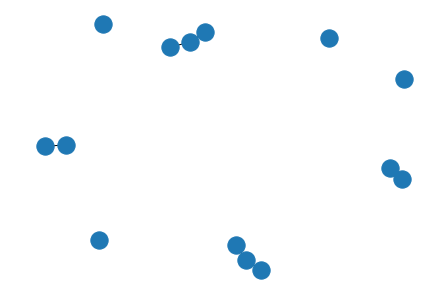

In [34]:
nx.draw(graph);

print("nx.is_connected(G):",nx.is_connected(graph),'\n')

nx.is_connected(G): True 



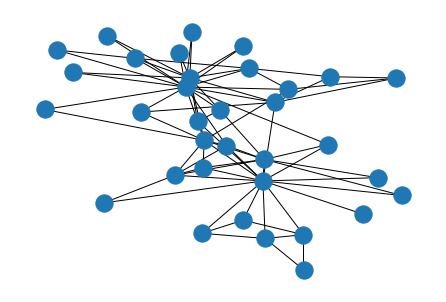

In [35]:
G = nx.karate_club_graph()
nx.draw(G);

print("nx.is_connected(G):",nx.is_connected(G),'\n')

__________
#### Components

A ***component*** $C$ of a graph $G=(V,E)$ is a connected subgraph of $G$. The ***largest connected component*** is simply the connected component with the most nodes in the network. The ***giant component*** of a graph is defined as the component whose size scales with the number of vertices of the graph (i.e. it diverges in the limit $N\rightarrow\infty$).

In a *directed graph*, a we have to introduce the notions of *strong* and *weak* when defining connected components. A ***weakly connected component*** is a connected subgraph where we consider all paths disregarding the direction of the edges and considering the graph *as if* it were undirected. ***Strongly connected components*** are connected subgraphs where edge direction plays an important factor.


##### "Bowtie" Structures of Directed Graphs

If we define two more subgraph structures...
- ***tendrils*** formed by nodes for which it does not exist a directed path that allows them to reach the GSCC, or to be reached from the GSCC;
- ***tubes*** formed by nodes that belong to a directed path connecting GIN to GOUT without crossing the GSCC.

...we complete what's known as the "bowtie" structure of directed graphs.

<img src="../../images/bowtie.png" alt="bowtie" width="500">

nx.is_weakly_connected(G_directed): True
nx.is_strongly_connected(G_directed): True


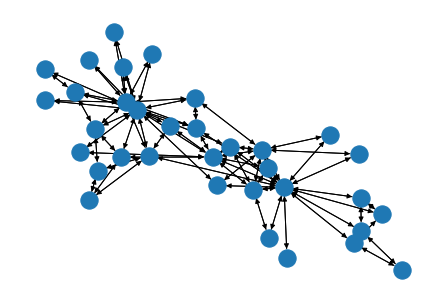

In [36]:
G_directed = nx.to_directed(G)

nx.draw(G_directed);

print("nx.is_weakly_connected(G_directed):",nx.is_weakly_connected(G_directed))
print("nx.is_strongly_connected(G_directed):",nx.is_strongly_connected(G_directed))

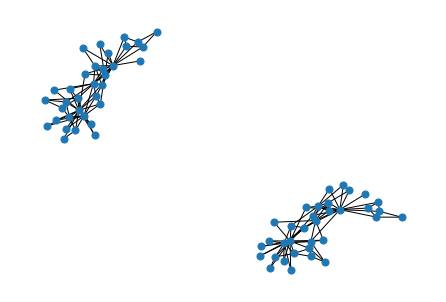

In [37]:
G_union = nx.union(G, G, rename=list(range(2*len(G))))
nx.draw(G_union, node_size=50)

In [38]:
# connected components
nx.connected_components(G)

<generator object connected_components at 0x7fcca086f7b0>

In [39]:
print(list(nx.connected_components(G)))
print(len(list(nx.connected_components(G))))

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]
1


In [40]:
G_union.remove_node('00')

In [41]:
print(len(list(nx.connected_components(G_union))))

4


In [42]:
largest_cc = max(nx.connected_components(G_union), key=len)
largest_cc

{'10',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '12',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '13',
 '130',
 '131',
 '132',
 '133',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19'}

In [43]:
# To create the induced subgraph of each component use:
S = [G_union.subgraph(c).copy() for c in nx.connected_components(G_union)]

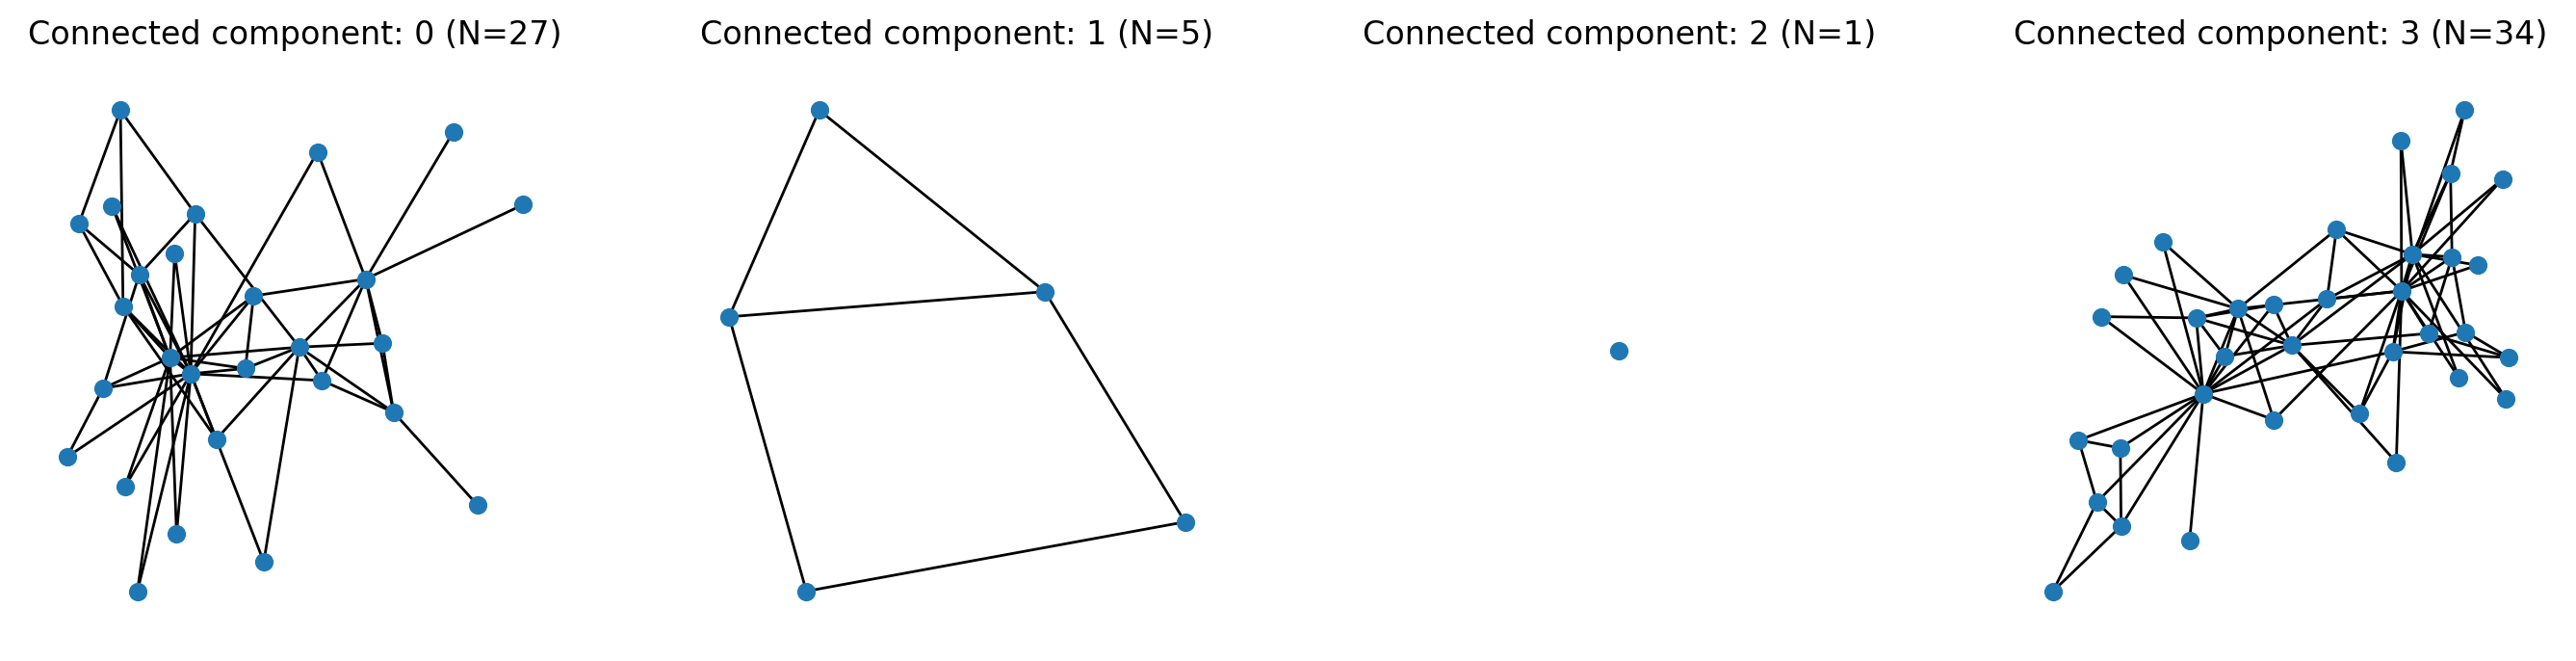

In [44]:
fig, ax = plt.subplots(1,len(S),figsize=(17,4),dpi=200)

for i,s in enumerate(S):
    nx.draw(s, ax=ax[i], node_size=35)
    ax[i].set_title('Connected component: %i (N=%i)'%(i,s.number_of_nodes()))
    
plt.show()

See https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.connected_components.html for more information about graphs and subgraphs.

______________

### Network Properties
#### Neighbors and Degrees

The __degree__ $k$ of a vertex is the number of neighbors of that node (i.e., its number of edges).

In an _undirected graph_, the degree of a node $i$ can be easily computed from the adjancency matrix $A$ by counting the number of 1's either over columns or over rows: $k_i = \sum_{j}a_{i,j} = \sum_{j}a_{j,i}$.

In _directed graphs_, we can compute the number of edges pointing towards a given node $i$, 
the __in-degree__ of node $i$, as: $k_i^{in} = \sum_{j}a_{j,i}$; <br>

or the number of edges pointing outwards a given node $j$, 
the __out-degree__ of node $i$, as: $k_i^{out} = \sum_{j}a_{i,j}$.<br>

Then, the __total degree__ of node $i$ in a _directed_ graph can be computed as: $k_i = k_i^{in} + k_i^{out}$.

In `networkx`, degree is a view of single node or of `nbunch` of nodes. If nbunch is omitted, then return degrees of *all* nodes:

In [45]:
nx.degree?

Signature: nx.degree(G, nbunch=None, weight=None)
Docstring:
Returns a degree view of single node or of nbunch of nodes.
If nbunch is omitted, then return degrees of *all* nodes.
File:      /usr/local/anaconda3/envs/covid/lib/python3.8/site-packages/networkx/classes/function.py
Type:      function


In [46]:
G = nx.karate_club_graph()
G.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [47]:
node_i = 0
print("Degree of node %i is %i"%(node_i,G.degree(node_i)))

Degree of node 0 is 16


In [48]:
G.degree().keys()

AttributeError: 'DegreeView' object has no attribute 'keys'

In [49]:
dict(G.degree())

{0: 16,
 1: 9,
 2: 10,
 3: 6,
 4: 3,
 5: 4,
 6: 4,
 7: 4,
 8: 5,
 9: 2,
 10: 3,
 11: 1,
 12: 2,
 13: 5,
 14: 2,
 15: 2,
 16: 2,
 17: 2,
 18: 2,
 19: 3,
 20: 2,
 21: 2,
 22: 2,
 23: 5,
 24: 3,
 25: 3,
 26: 2,
 27: 4,
 28: 3,
 29: 4,
 30: 4,
 31: 6,
 32: 12,
 33: 17}

In [50]:
degree_vals = list(dict(G.degree).values())

Wait a second though... isn't the Karate Club a weighted graph? 

The ___strength___ $s$ of a node isthe sum of the weights of edges connecting a given node and its neighbors. For an *undirected* weighted graph, the strength of node $i$ can be computed from the weighted adjancency matrix $W$ by summing the values of the weights either over the columns or over rows: $s_i = \sum_{j}w_{ij} = \sum_{j}w_{ji}$.

In [51]:
G.degree(weight='weight')

DegreeView({0: 42, 1: 29, 2: 33, 3: 18, 4: 8, 5: 14, 6: 13, 7: 13, 8: 17, 9: 3, 10: 8, 11: 3, 12: 4, 13: 17, 14: 5, 15: 7, 16: 6, 17: 3, 18: 3, 19: 5, 20: 4, 21: 4, 22: 5, 23: 21, 24: 7, 25: 14, 26: 6, 27: 13, 28: 6, 29: 13, 30: 11, 31: 21, 32: 38, 33: 48})

In *directed* weighted graphs, we compute the sum of the weights of the in/out edges of node $i$; the ***in-strength*** of node $i$ is $s_i^{in} = \sum_{j}w_{ji}$, and the ***out-strength*** of node $i$ is: $s_i^{out} = \sum_{j}w_{ij}$.

Therefore, the ***total strength*** of node $i$ in a *directed* graph can be computed as: $s_i = s_i^{in} + s_i^{out}$.

________________

## Generating Random Graphs

### Static Random Graph Models
#### Erdős-Rényi Model(s)

The original formulation: a $G_{(N,M)}$ graph is constructed starting from a set $V$ of $N$ different vertices connected at random by $M$ edges (Erdős and Rényi, 1959; 1960; 1961).

A variation of this model proposed by Gilbert (1959) constructs a $G_{(N,p)}$ graph from a set $V$ of $N$ different vertices in which each of the possibile $\frac{N(N-1)}{2}$ edges is present with probability $p$ (the _connection probability_).

The two models are statistically equivalent as $N \rightarrow \infty$ with:

$$ \dfrac{pN(N-1)}{2} = E $$

<!-- The exact ___degree distribution___ $P(k)$ of an Erdos-Renyi graph is a __Binomial distribution__:

$$ P(k) = \binom{N-1}{k} p^k (1-p)^{N-1-k},$$

in the limit for $N>> \langle k \rangle$ the ___degree distribution___ $P(k)$ can be approximated by the __Poisson distribution__:
$$ P(k) = e^{-\langle k \rangle}\frac{\langle k \rangle^k}{k!} $$ -->

In [52]:
N = 100
p = 0.01
E = p*N*(N-1)*0.5
av_deg = (N-1)*p
er = nx.erdos_renyi_graph(N,p) 
# the function called erdos_renyi actually generates the Gilbert variation of the model

## To generate the original Erdős-Rényi graph use
# er = nx.gnm_random_graph(N,int(E))

## And to generate the Gilbert graph you can also use
# g = nx.gnp_random_graph(N,p)

The average number of edges in this graph is:

$$ \langle E \rangle = \dfrac{N(N-1)p}{2}, $$

and the average degree is:

$$ \langle k \rangle = \frac{2\langle E \rangle}{N} = (N-1)p \simeq Np .$$

In [53]:
# the average number of edges generated in the construction of the graph
exp_E = 0.5*N*(N-1)*p 

B = 2000 # number of replications
actual_E = [nx.gnp_random_graph(N,p).number_of_edges() for b in range(B)]

print("Expected mean number of edges: %1.2f" % exp_E)
print("Actual mean number of edges: %1.2f (%d replications)" % (np.mean(actual_E),B))

Expected mean number of edges: 49.50
Actual mean number of edges: 49.53 (2000 replications)


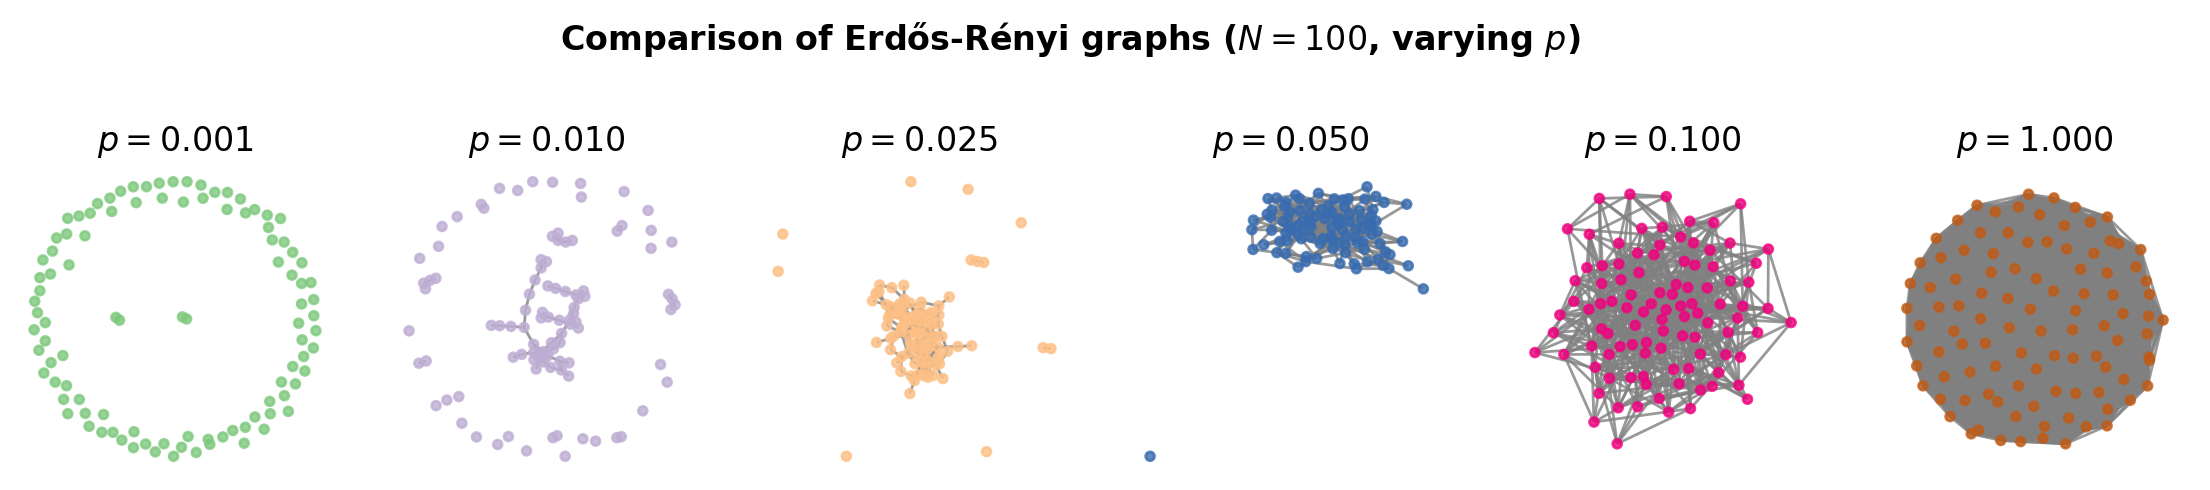

In [54]:
fig, ax = plt.subplots(1,6,figsize=(14,2),dpi=200)

N = 100
for i,p in enumerate([0.001, 0.01, 0.025, 0.05, 0.1, 1.0]):
    G = nx.erdos_renyi_graph(N,p)
    nx.draw_spring(G, ax=ax[i], node_size=10, node_color=[i/6]*N,
                   vmin=0, vmax=1, cmap='Accent', edge_color='.5', alpha=0.8)
    ax[i].set_title(r'$p=%.3f$'%p)


plt.suptitle(r'Comparison of Erdős-Rényi graphs ($N=%i$, varying $p$)'%N,
             y=1.25, fontweight='bold')
    
plt.show()

____
#### Random geometric graphs

Erdős-Rényi graphs are quite powerful, useful objects, despite their lack of realism. The model requires few (two) parameters, which can often allow them to be easily studied analytically numerically. Another similar family of random graphs is known as ***random geometric graphs***. Constructing a random geometric graph (RGG) involves randomly assigning $N$ nodes to positions on a geometric surface, then connecting each pair of nodes according to some function of their distance $d(i,j)$.

A simple version of this is to place $N$ nodes uniformly at random in the unit square, and connect every pair of nodes if the distance between the nodes is at most radius $r$.

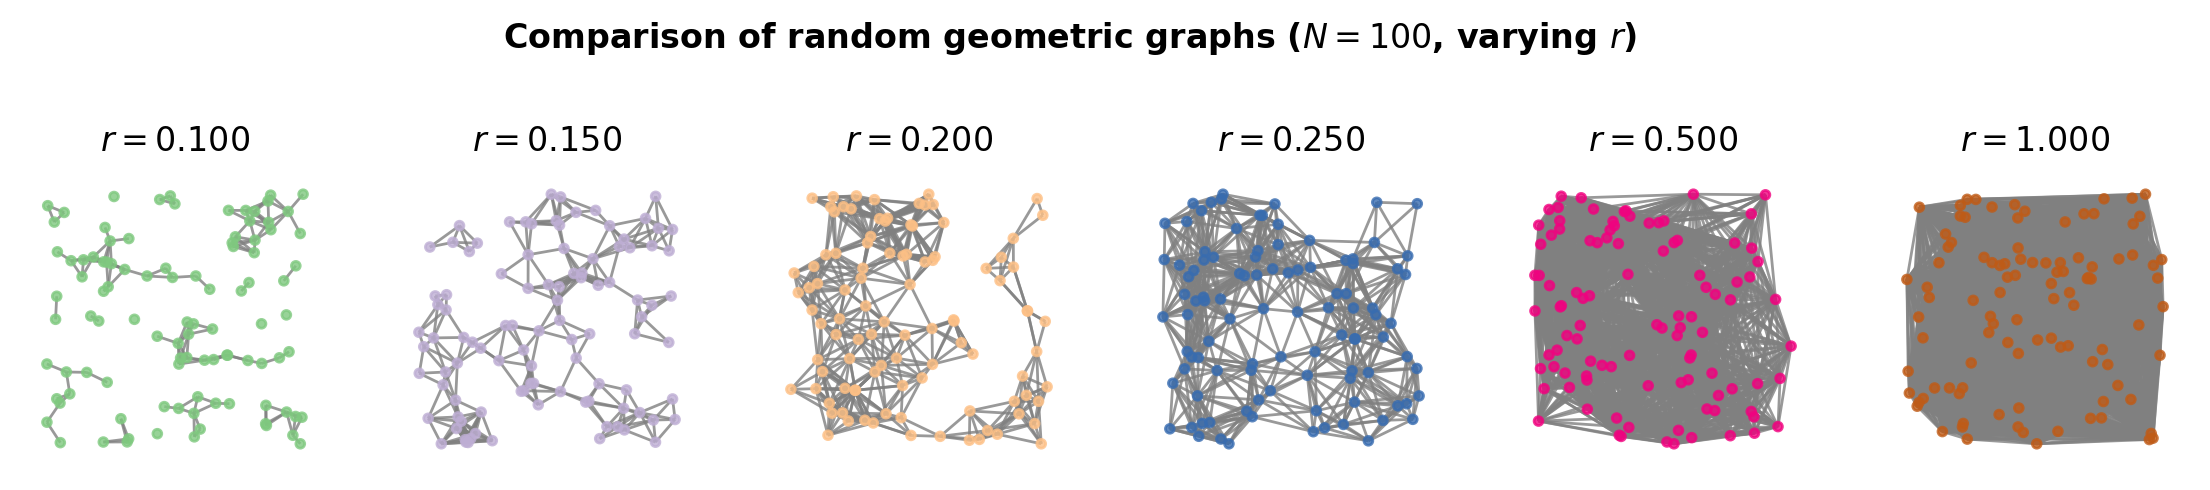

In [55]:
fig, ax = plt.subplots(1,6,figsize=(14,2),dpi=200)

N = 100
for i,r in enumerate([0.1, 0.15, 0.2, 0.25, 0.5, 1.0]):
    G = nx.random_geometric_graph(N,r)
    pos = nx.get_node_attributes(G,'pos')
    nx.draw(G, pos=pos, ax=ax[i], node_size=10, node_color=[i/6]*N,
            vmin=0, vmax=1, cmap='Accent', edge_color='.5', alpha=0.8)
    ax[i].set_title(r'$r=%.3f$'%r)


plt.suptitle(r'Comparison of random geometric graphs ($N=%i$, varying $r$)'%N,
             y=1.25, fontweight='bold')
    
plt.show()

#### Your turn!
In `networkx` there are many ways to create graphs, functions known as graph generators. 

Pick three graph generators from this list (that you haven't heard of!), and adapt the graph visualization code above to visualize small samples from each ensemble https://networkx.org/documentation/stable/reference/generators.html.

In [56]:
# Your code here

___________

## Data Input/Output

### Online Data Resources

There are many online resources that share network data to play around with.

- Network Repository (https://networkrepository.com/)
- Netzschleuder (https://networks.skewed.de/)
- Index of Complex Networks, aka ICON (https://icon.colorado.edu/)
- Mark Newman’s collection (https://public.websites.umich.edu/~mejn/netdata/)
- Awesome Network Analysis (https://github.com/briatte/awesome-network-analysis?tab=readme-ov-file#datasets)

### Network Data Formats
<a name="formats"></a>
There are a number of established network file formats that you may used for existing datasets. In the most basic form, all file formats must include: a. A list of nodes (perhaps with associated attributes) b. A list of edges (perhaps with associated attributes). Different file formats will store this in different, and some provide features that others don't. Here we ask you to look at a few file formats:

- Edgelist or CSV (https://networkx.org/documentation/stable/reference/readwrite/index.html)
- GraphML (https://networkx.org/documentation/stable/reference/readwrite/graphml.html)
- GML (https://networkx.org/documentation/stable/reference/readwrite/gml.html)
- Gephi (https://networkx.org/documentation/stable/reference/readwrite/gexf.html)
- JSON (https://networkx.org/documentation/stable/reference/readwrite/json_graph.html)
 
We typically will use edgelist formats, but GraphML files are often quite useful for storing and transmitting edge/node attribute data.

### Input / output of network data: The "Polblogs" dataset
**Source:** [Adamic, L. A., & Glance, N. (2005)](https://doi.org/10.1145/1134271.1134277https://doi.org/10.1145/1134271.1134277). The political blogosphere and the 2004 US election: Divided they blog. In *Proceedings of the 3rd International Workshop on Link Discovery* (pp. 36-43).

In the following we will learn how to load a directed graph, extract a vertex-induced subgraph, and compute the in- and out-degree of the vertices of the graph. We will use a directed graph that includes a collection of hyperlinks between weblogs on US politics, recorded in 2005 by Adamic and Glance.

The data are included in two tab-separated files:
* `polblogs_nodes.tsv`: node id, node label, political orientation (0 = left or liberal, 1 = right or conservative).
* `polblogs_edges.tsv`: source node id, target node id. 

#### Step-by-step way to make this network:
1. One-by-one add nodes (blogs)
2. Connect nodes based on hyperlinks between blogs

In [57]:
digraph = nx.DiGraph()
with open('data/polblogs_nodes_class.tsv','r') as fp:
    for line in fp:
        node_id, node_label, node_political = line.strip().split('\t')
        political_orientation = 'liberal' if node_political == '0' else 'conservative'
        digraph.add_node(node_id, website=node_label, political_orientation=political_orientation)

In [58]:
with open('data/polblogs_edges_class.tsv','r') as fp:
    for line in fp:
        source_node_id, target_node_id = line.strip().split('\t')
        digraph.add_edge(source_node_id, target_node_id)

In [59]:
print("Number of nodes: %d" % digraph.number_of_nodes())
print("Number of edges: %d" % digraph.number_of_edges())
print("Graph density:\t %1.7f" % nx.density(digraph))

Number of nodes: 1490
Number of edges: 19025
Graph density:	 0.0085752


In [60]:
degree = digraph.degree()
in_degree = digraph.in_degree()
out_degree = digraph.out_degree()

# I ususally make this a dictionary straight away
degree = dict(degree)
in_degree = dict(in_degree)
out_degree = dict(out_degree)

for i,j in list(degree.items())[:7]:
    print('Node', i, 'is connected to', j, 'other nodes')
print('...')
print('...... and so on')

Node 0 is connected to 27 other nodes
Node 1 is connected to 48 other nodes
Node 2 is connected to 0 other nodes
Node 3 is connected to 0 other nodes
Node 4 is connected to 4 other nodes
Node 5 is connected to 1 other nodes
Node 6 is connected to 1 other nodes
...
...... and so on


In [61]:
node = list(digraph.nodes())[0]

print('Degree of node %s: %d' % (node, degree[node]))
print('In-degree of node %s: %d' % (node, in_degree[node]))
print('Out-degree of node %s: %d' % (node, out_degree[node]))
print("Node %s's political orientation: %s" %(node, digraph.nodes[node]['political_orientation']))
print()
print("Average degree: %1.2f" % np.mean(list(degree.values())))
print("Average in-degree: %1.2f" % np.mean(list(in_degree.values())))
print("Average out-degree: %1.2f" % np.mean(list(out_degree.values())))

Degree of node 0: 27
In-degree of node 0: 12
Out-degree of node 0: 15
Node 0's political orientation: liberal

Average degree: 25.54
Average in-degree: 12.77
Average out-degree: 12.77


##### Connectivity patterns between liberal and conservative blogs

In [62]:
# Let us define two sets:
# 1) a set of "liberal" nodes
# 2) a set of "conservative" nodes

liberal = set()
conservative = set()

for node_id in digraph.nodes():

    if digraph.nodes[node_id]['political_orientation'] == 'liberal':
        liberal.add(node_id)
        
    else:
        conservative.add(node_id)

print("Number of liberal blogs: %d" % len(liberal))
print("Number of conservative blogs: %d" % len(conservative))

Number of liberal blogs: 758
Number of conservative blogs: 732


Let's now compute:
1. the number of edges between liberal blogs
2. the number of edges between conservative blogs
3. the number of edges from conservative blogs to liberal blogs
4. the number of edges from liberal blogs to conservative blogs

In [63]:
liberal_liberal = 0
conservative_conservative = 0
liberal_conservative = 0
conservative_liberal = 0

for source_node_id, target_node_id in digraph.edges():
    
    if (source_node_id in liberal) and (target_node_id in liberal):
        liberal_liberal += 1
        
    elif (source_node_id in liberal) and (target_node_id in conservative):
        liberal_conservative += 1
        
    elif (source_node_id in conservative) and (target_node_id in liberal):
        conservative_liberal += 1
        
    else:
        conservative_conservative += 1

In [64]:
print("Number of edges between liberal blogs: %d (%1.3f)" % (liberal_liberal, 
                                       liberal_liberal/float(digraph.number_of_edges()) ))
print("Number of edges between conservative blogs: %d (%1.3f)" % (conservative_conservative, 
                                            conservative_conservative/float(digraph.number_of_edges()) ))
print("Number of edges from liberal to conservative blogs: %d (%1.3f)" % (liberal_conservative, 
                                                    liberal_conservative/float(digraph.number_of_edges()) ))
print("Number of edges from conservative to liberal blogs: %d (%1.3f)" % (conservative_liberal, 
                                                    conservative_liberal/float(digraph.number_of_edges()) ))

Number of edges between liberal blogs: 8387 (0.441)
Number of edges between conservative blogs: 8955 (0.471)
Number of edges from liberal to conservative blogs: 781 (0.041)
Number of edges from conservative to liberal blogs: 902 (0.047)


##### Components (strongly vs weakly connected components)

In [65]:
# Number of components
print("Number of weakly connected components: %d" % nx.number_weakly_connected_components(digraph))
print("Number of strongly connected components: %d" % nx.number_strongly_connected_components(digraph))

# Find the size of the giant weakly connected component
N = digraph.number_of_nodes()
wccs = sorted(nx.weakly_connected_components(digraph), key=len, reverse=True)
gwcc = digraph.subgraph(wccs[0])
print("Size of the weakly giant connected component: %d (%1.2f)" % (len(gwcc), len(gwcc)/N))

# Find the size of the giant strongly connected component
sccs = sorted(nx.strongly_connected_components(digraph), key=len, reverse=True)
gscc = digraph.subgraph(sccs[0])
print("Size of the strongly giant connected component: %d (%1.2f)" %  (len(gscc), len(gscc)/N))

Number of weakly connected components: 268
Number of strongly connected components: 688
Size of the weakly giant connected component: 1222 (0.82)
Size of the strongly giant connected component: 793 (0.53)


##### Preview: Paths and Path Lengths

In [66]:
graph = gscc.copy()
print("Is the graph directed?",graph.is_directed())

print("Average shortest-path length: %1.3f" % nx.average_shortest_path_length(graph))
print("Graph radius: %1.3f" % nx.radius(graph))
print("Graph diameter: %1.3f" % nx.diameter(graph))
print()
graph = graph.to_undirected()
print("Average shortest-path length: %1.3f" % nx.average_shortest_path_length(graph))
print("Graph radius: %1.3f" % nx.radius(graph))
print("Graph diameter: %1.3f" % nx.diameter(graph))

Is the graph directed? True
Average shortest-path length: 3.189
Graph radius: 5.000
Graph diameter: 8.000

Average shortest-path length: 2.424
Graph radius: 3.000
Graph diameter: 5.000


##### Visualizing the PolBlogs data
(helpful color website: http://tools.medialab.sciences-po.fr/iwanthue/)

In [67]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from matplotlib import rc
rc('axes', fc='w')
rc('figure', fc='w')
rc('savefig', fc='w')
rc('axes', axisbelow=True)

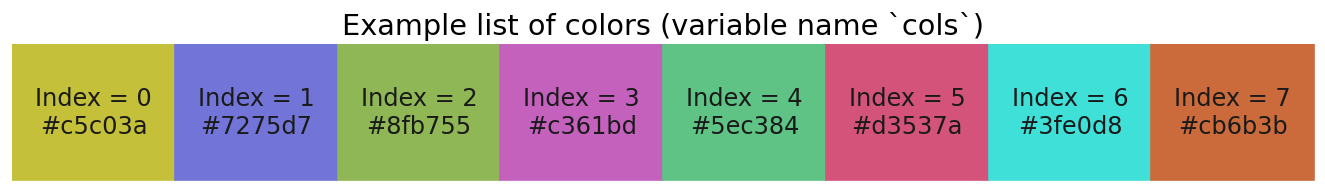

In [68]:
cols = ["#c5c03a","#7275d7","#8fb755","#c361bd","#5ec384","#d3537a","#3fe0d8","#cb6b3b"]


fig, ax = plt.subplots(1,1,figsize=(len(cols)*1.75,1.5),dpi=120)

xvals = np.linspace(0,1,len(cols)+1)
for i in range(len(xvals)-1):
    ax.fill_between([xvals[i],xvals[i+1]],
                     0,1,color=cols[i])
    ax.text(np.mean([xvals[i],xvals[i+1]]),0.5,'Index = %i\n%s'%(i,cols[i]),
            ha='center',va='center',color='.1',fontsize='x-large')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_axis_off()
ax.set_title('Example list of colors (variable name `cols`)',fontsize='xx-large')

plt.show()

In [69]:
# get the political leanings and assign them to colors
leanings = nx.get_node_attributes(graph,'political_orientation')
node_colors = [cols[0] if leaning=='conservative' else cols[1] \
               for leaning in leanings.values()]

edge_colors = '.4'

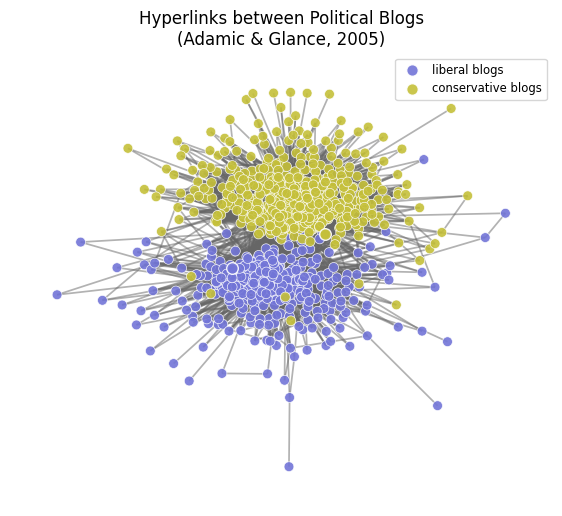

In [70]:
fig, ax = plt.subplots(1,1,figsize=(7,6),dpi=100)

# first assign nodes to a position in the pos dictionary
pos = nx.spring_layout(graph)

# then draw the nodes
nx.draw_networkx_nodes(graph, pos, node_color=node_colors,
                       node_size=50, edgecolors='w', alpha=0.9, linewidths=0.5, ax=ax)

## without node outlines
# nx.draw_networkx_nodes(graph, pos, node_color=node_colors, node_size=50, alpha=0.9, ax=ax)

# then draw the edges
nx.draw_networkx_edges(graph, pos, edge_color=edge_colors, width=1.25, alpha=0.5, ax=ax)

ax.set_title('Hyperlinks between Political Blogs\n(Adamic & Glance, 2005)', fontsize='large')
ax.set_axis_off()

legend_node0 = '0'
legend_node1 = '1000'

##### just for adding legend, is unnecessary #####
nx.draw_networkx_nodes(graph, {legend_node0:pos[legend_node0]}, nodelist=[legend_node0], 
                       label='liberal blogs', 
                       node_color=cols[1], node_size=70, edgecolors='w', alpha=0.9, ax=ax)
nx.draw_networkx_nodes(graph, {legend_node1:pos[legend_node1]}, nodelist=[legend_node1], 
                       label='conservative blogs',
                       node_color=cols[0], node_size=70, edgecolors='w', alpha=0.9, ax=ax)
ax.legend(fontsize='small')

## I tend to save two figures each time:
## - one png, which is good for slides, and
## - one pdf, which is good for papers

plt.savefig('figures/pngs/PolBlogs_network.png', dpi=425, bbox_inches='tight')
plt.savefig('figures/pdfs/PolBlogs_network.pdf', bbox_inches='tight')
plt.show()

______________

#### Input/Output 2: Bipartite Network of Paul Revere

In this example we are going to use a bipartite graph obtained collecting users *metadata*.

The analysis in this example is based on information gathered by our field agent Mr. David Hackett Fischer and published in an Appendix to his report to the government. For more details consult: https://github.com/kjhealy/revere.

In [71]:
# reading Paul Revere data line by line; print the first few lines to get a sense of the data

with open('data/PaulRevereAppD.csv', 'r') as fp:
    z = 0 
    for line in fp:
        print(line.strip())
        if z > 5:
            break
        z += 1

,StAndrewsLodge,LoyalNine,NorthCaucus,LongRoomClub,TeaParty,BostonCommittee,LondonEnemies
Adams.John,0,0,1,1,0,0,0
Adams.Samuel,0,0,1,1,0,1,1
Allen.Dr,0,0,1,0,0,0,0
Appleton.Nathaniel,0,0,1,0,0,1,0
Ash.Gilbert,1,0,0,0,0,0,0
Austin.Benjamin,0,0,0,0,0,0,1


In [72]:
# reading Paul Revere data line by line
G = nx.Graph()

societies = ['StAndrewsLodge','LoyalNine','NorthCaucus','LongRoomClub',
             'TeaParty','BostonCommittee','LondonEnemies']
individuals = []

with open('data/PaulRevereAppD.csv', 'r') as fp:
    z = 0
    for line in fp:
        if z > 0:
            node_incidence_i = line.strip().split(',')
            node_id_i = " ".join(node_incidence_i[0].split('.')[::-1])
            individuals.append(node_id_i)

            for ij in range(len(node_incidence_i[1:])):
                if node_incidence_i[1:][ij]=='1':
                    G.add_edge(node_id_i, societies[ij])

        z += 1

In [73]:
N1 = len(individuals)
N2 = len(societies)
print("Number of individuals: %d" %N1)
print("Number of organizations: %d" %N2)

Number of individuals: 254
Number of organizations: 7


In [74]:
nx.is_bipartite(G)

True

A ***bipartite*** graph (or two-mode network) is a graph with two distinct node types and links that only connect across node type. 

Formally, a graph $G=(V,E)$ is bipartite if the set of nodes $V$ is composed by two distinct and disjoint sets $V_1,V_2$ and all edges $e_{i,j} \in E$ are such that $i\in V_1$ and $j\in V_2$.

A bipartite graph $G=(V = \{V_1,V_2\},E)$ can be represented by an $N_1\times N_2$ **incidence matrix** $B$,

$$ B = 
\begin{pmatrix}
    b_{1,1} & b_{1,2} & \cdots & b_{1,N_2} \\
    \vdots  & \vdots  & \ddots & \vdots  \\
    b_{N_1,1} & b_{N,2} & \cdots & b_{N_1,N_2} 
\end{pmatrix},
$$

where $N_1 = |V_1|$, $N_2 = |V_2|$, and $\forall i \in V_1$ and $j \in V_2$, 
$$b_{i,j} =
  \begin{cases}
    1       & \quad \text{if } e_{i,j} \in E\\
    0  & \quad \text{if } e_{i,j} \notin E\\
  \end{cases}$$


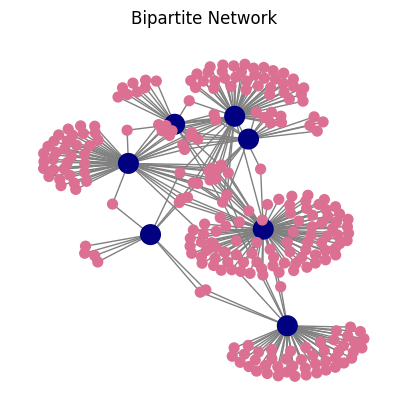

In [75]:
fig, ax = plt.subplots(1,1,figsize=(5,5),dpi=100)

nx.draw(G,
        edge_color='.5',
        node_size=[50 if i in individuals else 200 for i in G.nodes()], 
        node_color=['palevioletred' if i in individuals else 'navy' for i in G.nodes()])
ax.set_title('Bipartite Network')


plt.show()

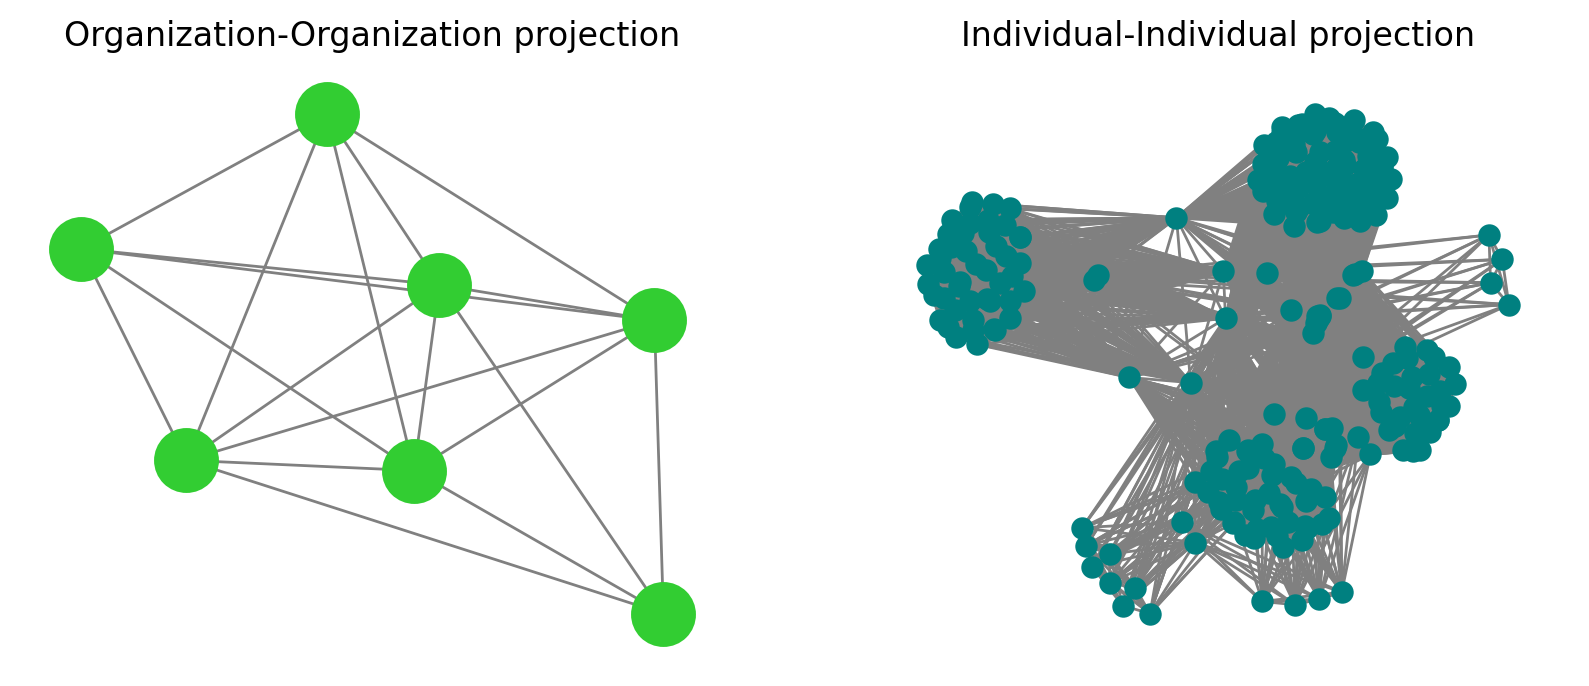

In [76]:
fig, ax = plt.subplots(1,2,figsize=(10,4),dpi=200)

nx.draw(nx.projected_graph(G, societies), ax=ax[0], node_size=500, edge_color='.5', node_color='limegreen')
nx.draw(nx.projected_graph(G, individuals), ax=ax[1], node_size=50, edge_color='.5', node_color='teal')

ax[0].set_title('Organization-Organization projection')
ax[1].set_title('Individual-Individual projection')

plt.show()

__________
## Next time...
Further Introduction to Networkx — Graph Algorithms! `class_03_networkx2.ipynb`
_______

## References and further resources:

1. Class Webpages
    - Jupyter Book: https://network-science-data-and-models.github.io/phys7332_fa25/README.html
    - Github: https://github.com/network-science-data-and-models/phys7332_fa25/
    - Syllabus and course details: https://brennanklein.com/phys7332-fall25
2. `networkx` documentation and tutorials: https://networkx.org/documentation/latest/tutorial.html
3. Gilbert, E.N. (1959). Random Graphs. *Ann. Math. Stat.*, 30, 1141.
4. Erdős, P. and Rényi, A. (1959). On Random Graphs. *Publ. Math.* 6, 290.
4. Penrose, M. (2003). Random Geometric Graphs. *Oxford Studies in Probability*, 5.

________________